## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [31]:
!pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
import pandas_datareader.data as pdr
import datetime

start = datetime.date(2015,1,2) 
end = datetime.date(2019,12,31)
apple = pdr.get_data_yahoo('AAPL',start,end)
apple.head()

In [ ]:
fig, ax = plt.subplots(figsize = (30, 15)) 
plt.title(f'Цены акций Apple с {start} по {end}') 
ax.plot(apple['Open']) 
ax.grid(True)
plt.show()

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

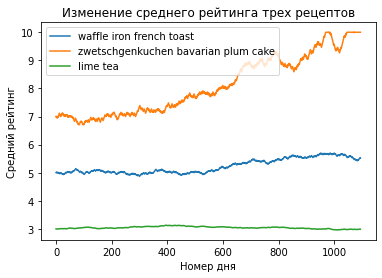

In [18]:
f = np.load('/content/average_ratings.npy')
fig, ax = plt.subplots()
plt.title('Изменение среднего рейтинга трех рецептов')
plt.xlabel('Номер дня')
plt.ylabel('Средний рейтинг')

ax.plot(f[0], label = 'waffle iron french toast')
ax.plot(f[1], label = 'zwetschgenkuchen bavarian plum cake')
ax.plot(f[2], label = 'lime tea')
ax.legend()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


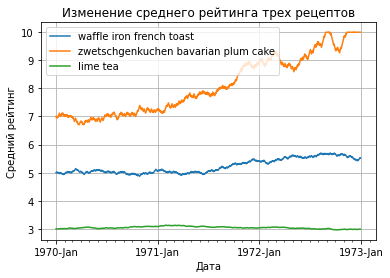

In [19]:
fig, ax = plt.subplots()
plt.title('Изменение среднего рейтинга трех рецептов')
plt.xlabel('Дата')
plt.ylabel('Средний рейтинг')

ax.plot(f[0], label = 'waffle iron french toast')
ax.plot(f[1], label = 'zwetschgenkuchen bavarian plum cake')
ax.plot(f[2], label = 'lime tea')
ax.legend()

ax.grid(True)

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

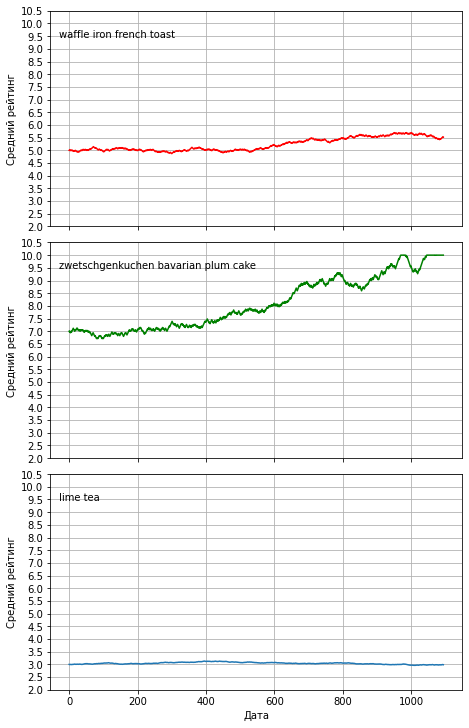

In [21]:
fig, axs = plt.subplots(3, 1, figsize=(6.4, 10), constrained_layout=True)
plt.xlabel("Дата")
plt.ylabel("Средний рейтинг")
axs[0].plot(f[0], label = 'waffle iron french toast', c = 'red')
axs[1].plot(f[1], label = 'zwetschgenkuchen bavarian plum cake', c = 'green')
axs[2].plot(f[2], label = 'lime tea')

titles = ['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea']
for i in range(len(axs)):
    axs[i].grid(True)
    axs[i].set_title(titles[i], loc='left', y=0.85, x=0.02, fontsize='medium')
    axs[i].set_ylabel("Средний рейтинг")
    axs[i].set_yticks(np.arange(2, 11, step=0.5))
    
    if i != 2:
        axs[i].set_xticklabels([])

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


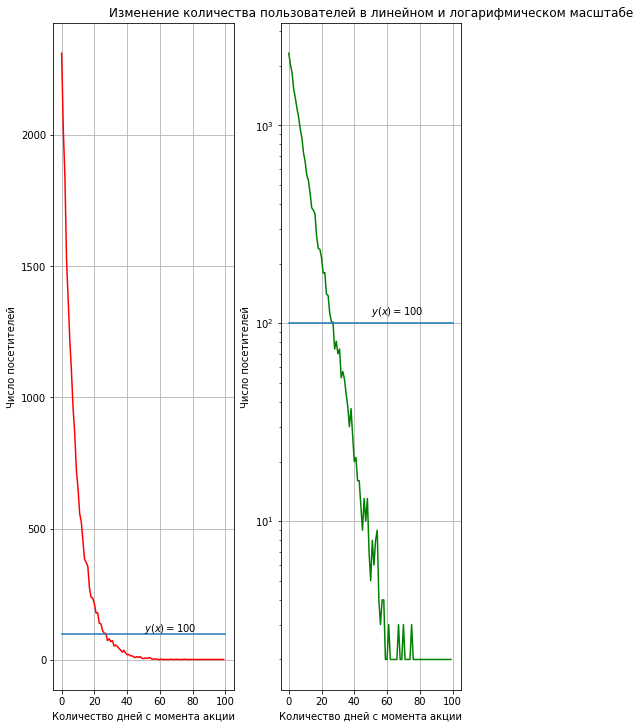

In [23]:
f2 = np.load('/content/visitors.npy')
fig, ax = plt.subplots(1, 2, figsize = (6.4,10), constrained_layout=True)
plt.title("Изменение количества пользователей в линейном и логарифмическом масштабе")
ax[0].plot(f2, label='waffle iron french toast', c='red')
ax[1].plot(f2, label='zwetschgenkuchen bavarian plum cake', c='green')
ax[1].set_yscale('log')
for i in range(2):
  x = np.linspace(0,100)
  ax[i].plot(x, [100 for i in range(50)])
  ax[i].text(50,110,"$y(x)=100$")
  ax[i].set_xlabel('Количество дней с момента акции')
  ax[i].set_ylabel('Число посетителей')
  ax[i].grid(True)

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [24]:
reviews = pd.read_csv('/content/reviews_sample.csv')
recipes = pd.read_csv('/content/recipes_sample.csv')

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [25]:
recipes["text_time"]= recipes.minutes.apply(lambda x: "short" if x < 5 else("medium" if x<50 else "long"))
new_recipes = recipes.groupby(by="text_time")["n_steps"].agg(["mean", "count"])

Text(0.5, 1.0, 'Размеры групп рецептов')

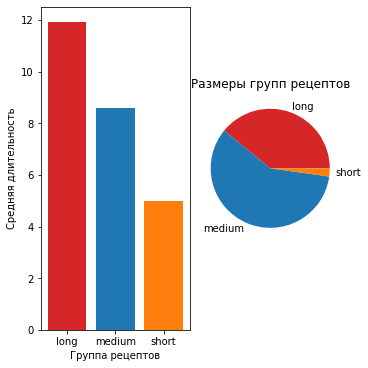

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(5, 5), constrained_layout=True)
l = new_recipes.index.values
st = new_recipes["mean"].values
colors = ['tab:red', 'tab:blue', 'tab:orange']
axs[0].bar(l, st, color=colors)
axs[0].set_xlabel("Группа рецептов")
axs[0].set_ylabel("Средняя длительность")

counts = new_recipes["count"].values
axs[1].pie(counts, labels=l, colors=colors)
axs[1].set_title("Размеры групп рецептов")

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

<ipython-input-27-be0d179addc8>:9: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(bottom=0.1, right=2.2, top=0.9)


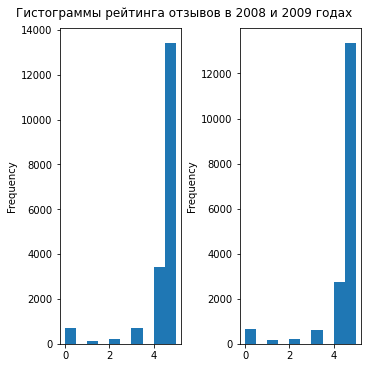

In [27]:
reviews["date"] = pd.to_datetime(reviews["date"])
rating2008 = reviews.loc[reviews["date"].dt.year==2008]["rating"]
rating2009 = reviews.loc[reviews["date"].dt.year==2009]["rating"]

fig, axs = plt.subplots(1, 2, figsize=(5, 5), constrained_layout=True)
plt.suptitle("Гистограммы рейтинга отзывов в 2008 и 2009 годах")
rating2008.plot(ax=axs[0], kind="hist")
rating2009.plot(ax=axs[1], kind="hist")
plt.subplots_adjust(bottom=0.1, right=2.2, top=0.9)

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

<Axes: title={'center': 'Диаграмма рассеяния n_steps и n_ingredients'}, xlabel='n_steps', ylabel='n_ingredients'>

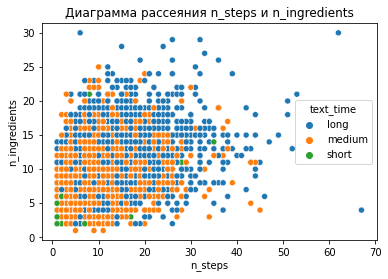

In [29]:
plt.title('Диаграмма рассеяния n_steps и n_ingredients')
sns.scatterplot(data=recipes, x="n_steps", y="n_ingredients", hue="text_time")

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

<Axes: title={'center': 'Корреляционная матрица числовых столбцов таблиц recipes и reviews'}>

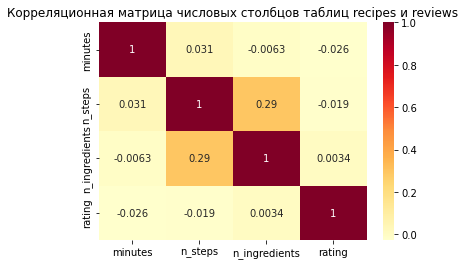

In [30]:
plt.title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')
n = pd.merge(recipes, reviews, left_on="id", right_on="recipe_id")
cor = n[["minutes", "n_steps", "n_ingredients", "rating"]].corr()
sns.heatmap(cor, annot=True, cmap="YlOrRd")